In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#Ans 1

In [ ]:
Path=('/content/drive/MyDrive/Data Science/Data Mining/Project/bank_marketing_part1_Data.csv')
Bank_Data= pd.read_csv(Path)

In [ ]:
Bank_Data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [ ]:
Bank_Data.shape

(210, 7)

In [ ]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [ ]:
Bank_Data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [ ]:
Bank_Data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [ ]:
dups = Bank_Data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Bank_Data[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


##Ans 1.1

###Univariate Analysis

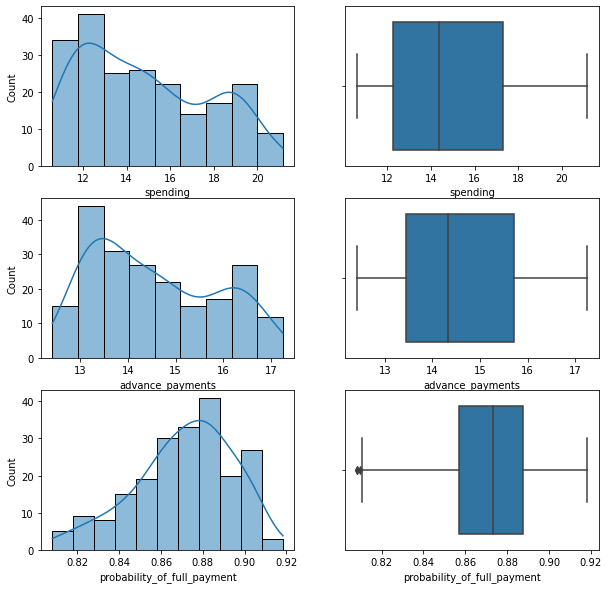

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,10)
sns.histplot(Bank_Data['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=Bank_Data, ax=axes[0][1])
sns.histplot(Bank_Data['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=Bank_Data , ax=axes[1][1])
sns.histplot(Bank_Data['probability_of_full_payment'] , kde=True, ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment', data=Bank_Data , ax=axes[2][1])
plt.show()

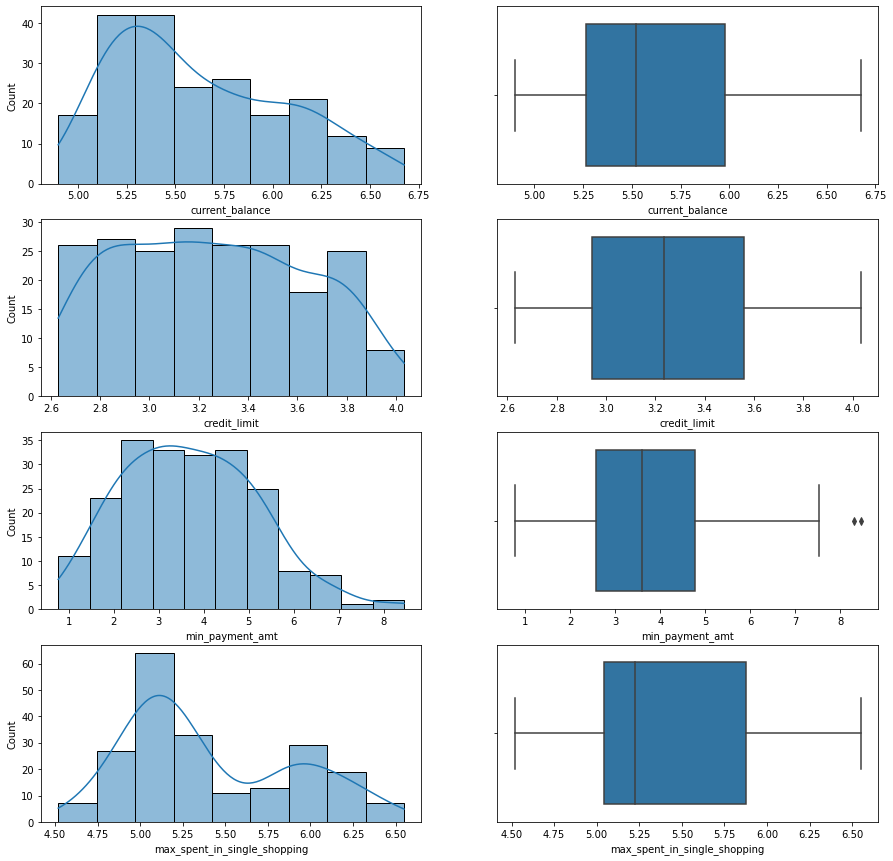

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.histplot(Bank_Data['current_balance'], kde=True, ax=axes[0][0])
sns.boxplot(x='current_balance', data=Bank_Data, ax=axes[0][1])
sns.histplot(Bank_Data['credit_limit'] , kde=True, ax=axes[1][0])
sns.boxplot(x='credit_limit', data=Bank_Data , ax=axes[1][1])
sns.histplot(Bank_Data['min_payment_amt'] , kde=True, ax=axes[2][0])
sns.boxplot(x='min_payment_amt', data=Bank_Data , ax=axes[2][1])
sns.histplot(Bank_Data['max_spent_in_single_shopping'] , kde=True, ax=axes[3][0])
sns.boxplot(x='max_spent_in_single_shopping', data=Bank_Data , ax=axes[3][1])
plt.show()

###From the above visualization and analysis the data I can see that for

*   Spending - Data is normally distributed and the mean and median are almost same. The mean for spending is 14.85 and the median is 14.35. The minimum amount spent by the customers per month in 1000s is 10.59 and the maximum amount spent by the customers per month in 1000s is 21.18. No outlier is detected.
*   advance_payments - Data is normally distributed and the mean and median are almost same. The mean for advance payments is 14.56 and the median is 14.32. The minimum amount paid by the customers in advance in 100s is 12.41 and the maximum amount paid by the customers in advance in 100s is 17.25. No outlier is detected.
*   probability_of_full_payment	- Here median is little bit greater than mean so I can not say it fully normally distributed. The mean is 0.871 and the median is 0.8734. It is negatively skewed. The minimum probability of payment done in full by the customer to the bank is 0.81 and the maximum probability of payment done in full by the customer to the bank is 0.92. Outliers are present.
*   current_balance - The mean is being little bit greater than median, the data is little bit positively skewed. The mean for current balance is 5.63 and the median is 5.52. The minimum balance amount left in the account to make purchases in 1000s is 4.9 and the maximum amount left in the account to make purchases in 1000s is 6.7. No outlier is detected.
*   credit_limit- Data is normally distributed and the mean and median are almost same. The mean for credit limit is 3.26 and the median is 3.24. The minimum limit of amount in credit card in 10000s is 2.63 and the maximum limit of amount in credit card in 10000s is 4.0. No outlier is detected.
*   min_payment_amt- Data is positively skewed and the mean is little bit greater than median. The mean is 3.7 and the median is 3.6. The minimum paid by the customer while making payments for purchases made monthly (in 100s) ranges from 0.77 to 8.45. The Outliers are detected.
*   max_spent_in_single_shopping- Data is positively skewed. The mean is 5.41 and the median is 5.22. The maximum amount spent in single shopping presented ranges from 4.52 to 6.55. No outlier is detected.

###Multivariate Analysis

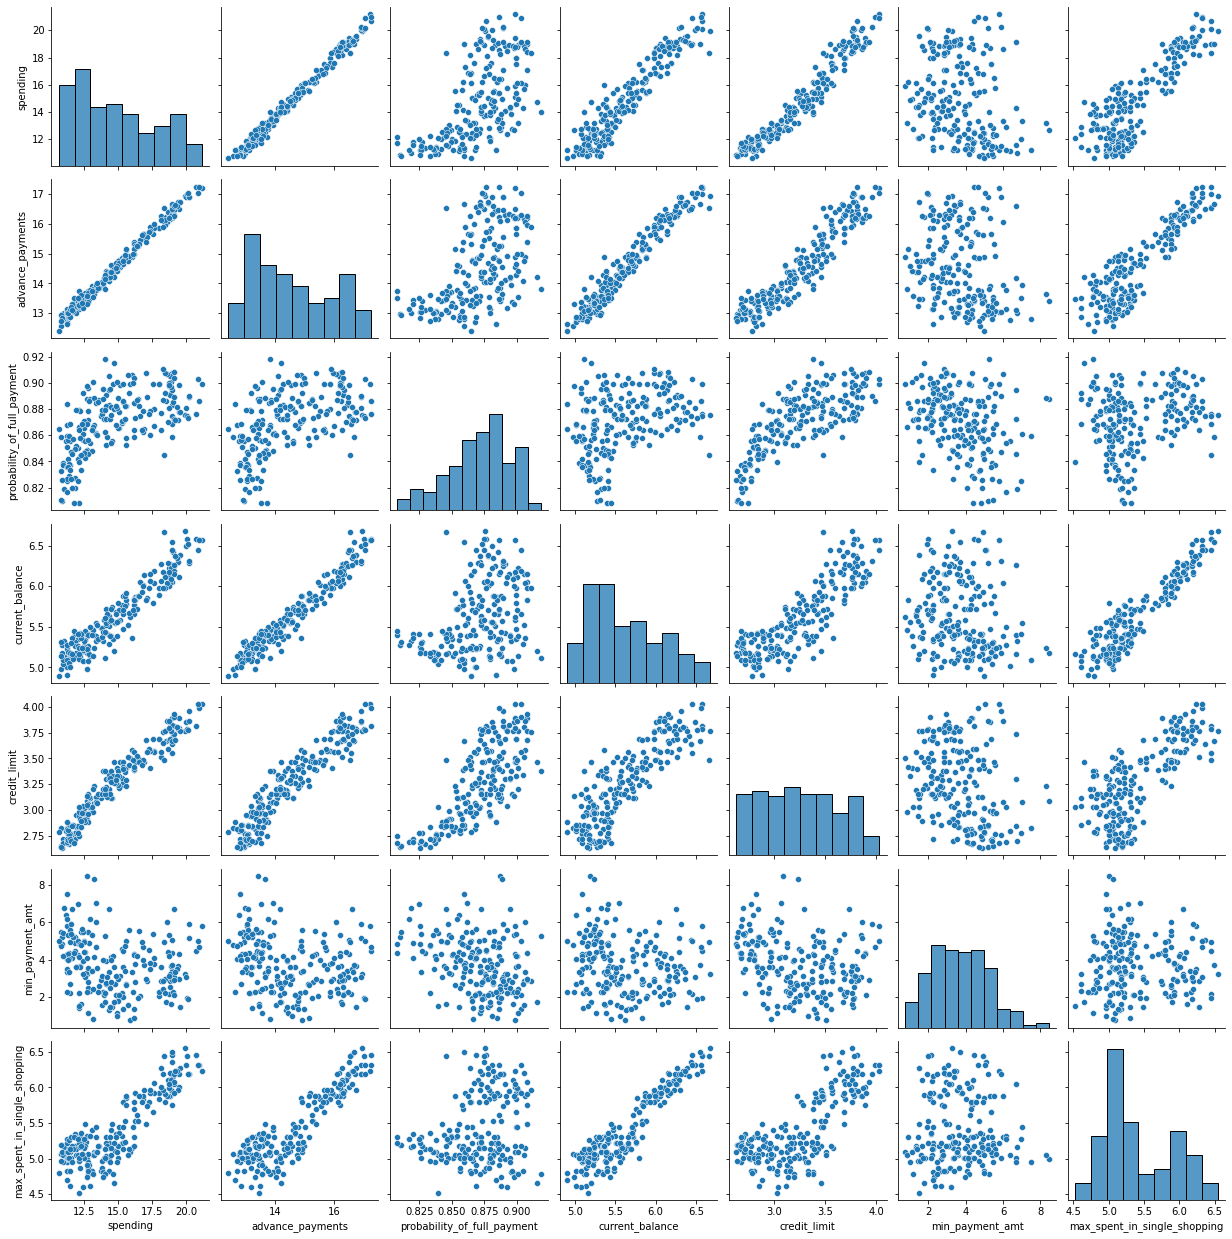

In [ ]:
sns.pairplot(Bank_Data)
plt.show()

###From the above visualization I can clearly see that there are strong positive correlations between spending & advance_payments, advance_payments & current_balance, credit_limit & spending, spending & current_balance, credit_limit & advance_payments,max_spent_in_single_shopping & current_balance.

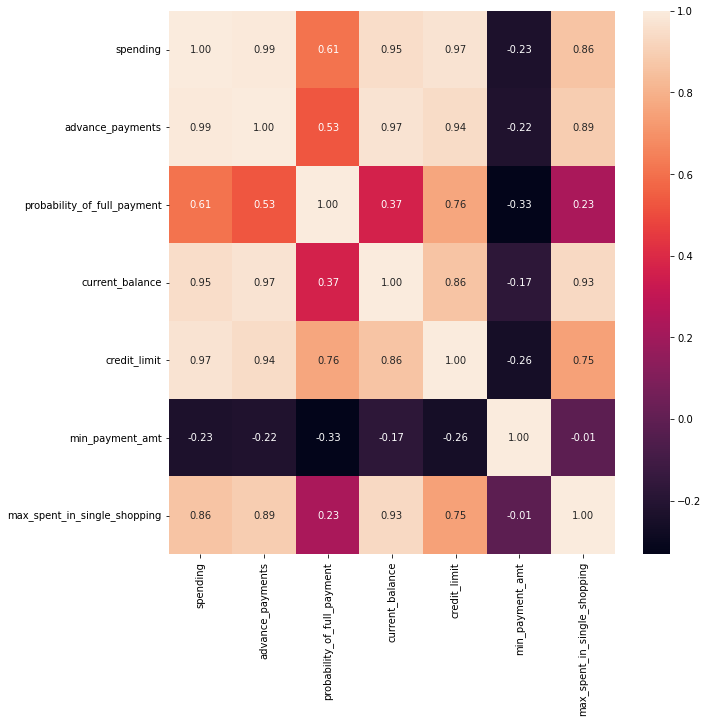

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(Bank_Data.corr(),annot=True,fmt=".2f");

##Ans 1.2

Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler()

In [ ]:
Scaled_df = pd.DataFrame(X.fit_transform(Bank_Data), columns=Bank_Data.columns)

In [ ]:
Scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


##Ans 1.3

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
wardlink = linkage(Scaled_df, method = 'ward')

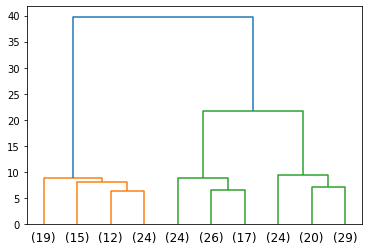

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
#Method 1
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [ ]:
#Method 2
clusters = fcluster(wardlink, 23, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

###From the above visualizations I can simply see that there are 2 clusters present. To verify it more I have used 'fcluster' function with two different methods using different criteria 'maxclust' and 'distance'.
###Maxclust is the criteria where I can see from the plots that there are two clusters present.
###Distance is the criteria where I can see from the plots that all the clusters are present under the distance of approximate 23 units horizontally.
###So applying both the criterias I have explained the clusters here.

##Ans 1.4

In [ ]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [ ]:
k_means.fit(Scaled_df)

KMeans(n_clusters=2, random_state=1)

In [ ]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
k_means.inertia_

659.171754487041

In [ ]:
k_means = KMeans(n_clusters = 1)
k_means.fit(Scaled_df)
k_means.inertia_

1469.9999999999998

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Scaled_df)
k_means.inertia_

430.6589731513007

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(Scaled_df)
k_means.inertia_

371.65314399951615

###From the above calculations I have formed clusters with K=1,2,3,4 and compared with WSS i.e., Within Cluster Sum of Squares and noticed WSS reduces when K means increases.

###Applying K-Elbow method

In [ ]:
wss =[] 

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(Scaled_df)
    wss.append(KM.inertia_)

In [ ]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513007,
 371.1846125351018,
 326.3061827611607,
 289.24573672030147,
 262.35002694732964,
 240.11626568619675,
 225.0108857012583,
 210.57305772311796]

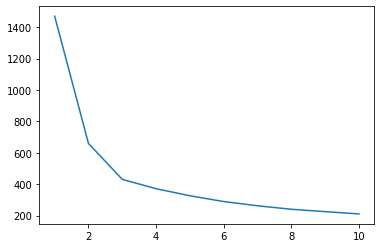

In [ ]:
plt.plot(range(1,11), wss)
plt.show()

In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(Scaled_df)
labels = k_means.labels_

###Calculating Silhouette score for 2 Clusters

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(Scaled_df,labels)

0.46577247686580914

###Calculating Silhouette score for 3 Clusters

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Scaled_df)
labels_1 = k_means.labels_

In [ ]:
silhouette_score(Scaled_df,labels_1)

0.40072705527512986

###The Silhouette score is better when there is 2 clusters so I will proceed with 2 clusters. The final number of clusters is 2.

In [ ]:
Bank_Data["Clusters"] = labels
Bank_Data.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,0
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,0
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,0
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0


In [ ]:
sil_width = silhouette_samples(Scaled_df,labels)

In [ ]:
Bank_Data["sil_width"] = sil_width
Bank_Data.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.603797
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.008748
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.678038
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.495306
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.548072
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,0,0.339775
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,0,0.583269
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,0,0.503256
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,0.588190
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0,0.615891


###Ans 1.5

###Cluster Profiling

In [ ]:
Bank_Data.Clusters.value_counts().sort_index()

0    133
1     77
Name: Clusters, dtype: int64

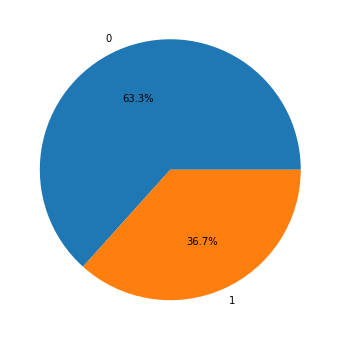

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(Bank_Data['Clusters'].value_counts(),labels=Bank_Data['Clusters'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
clust_profile=Bank_Data
clust_profile=clust_profile.groupby('Clusters').mean()
clust_profile['freq']=Bank_Data.Clusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,freq
Clusters,,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,0.439683,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,0.510837,77


###From the above analysis I can state that
* Cluster 0: Customers with high amount spent per month, high amount paid in advance by cash, high probability of payment done in full to the bank, high balance amount left in bank account, high credit limit, high amount spent in one purchase but low amount paid while making payments for purchases made monthly.
** Promotional Strategies for Cluster 0:

    The customers belong to this group can be offered with exciting loan offers.

    They can be offered special discount offers while making payments for purchases made monthly. 

    They can be offered rewards and offers while payment with cards so that they can switch their payment from ‘in advance by cash’ to card payment.

* Cluster 1: Customers with low amount spent per month, low amount paid in advance by cash, low probability of payment done in full to the bank, low balance amount left in bank account, low credit limit, low amount spent in one purchase but high amount paid while making payments for purchases made monthly.
** Promotional Strategies for Cluster 1:

    The customers belong to this group can be offered special interests while keeping money at bank accounts.
    
    They can be offered special discount offers while spending money with bank cards.
